Normal Probability Plot
---

Purpose:

Check If Data Are Approximately Normally Distributed

The normal probability plot (Chambers et al., 1983) is a graphical technique.

The normal probability plot is formed by:

Vertical axis: Ordered response values

Horizontal axis: Normal order statistic medians

For the exponential distribution, and a few others, there are simple transformations we can use to test whether an analytic distribution is a good model for a dataset.

For the normal distribution there is no such transformation, but there is an alternative called a normal probability plot. There are two ways to generate a normal probability plot: the hard way and the easy way. If you are interested in the hard way, you can read about it at https://en.wikipedia.org/wiki/Normal_probability_plot.



In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

In [105]:
def eval_cdf(value,series):
    count =0
    for x in series:
        if x <= value:
            count += 1
    return count/len(series)

def compute_cdf(df,label):
    x = sorted(list(df[label].values))
    y = []
    for value in x:
        y.append(eval_cdf(value,x))
    return x,y

# plot the z_values(mean,std) vs z_values(0,1)
def fitLine(series):
    mean=np.mean(series)
    std = np.std(series)
    lim = [-4,4]
    y = [std*x+mean for x in lim]
    return lim,y

In [106]:
os.chdir(os.path.join('..','data'))
df = pd.read_csv(r'2002FemPreg.csv',low_memory=False)
df = df[['caseid','prglngth','outcome','pregordr','birthord','totalwgt_lb','agepreg','finalwgt']]
df_live = df[df['outcome']==1]
# removing null values
df = df_live[df_live['totalwgt_lb'].notnull()]

In [107]:
x,y = compute_cdf(df,'totalwgt_lb')

In [108]:
def norm_cdf(size,mean,std):
    z_values = np.linspace(norm.ppf(0.0001,loc=mean,scale=std),norm.ppf(0.9999,loc=mean,scale=std),size)
    return [norm.cdf(x,loc=mean,scale=std) for x in z_values],z_values

mean = df['totalwgt_lb'].mean()
std= df['totalwgt_lb'].std()

model,z = norm_cdf(100,mean,std)

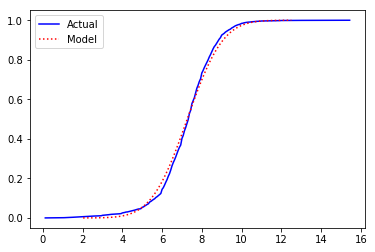

In [109]:
plt.plot(x,y,label='Actual',color='blue')
plt.plot(z,model,label='Model',linestyle=':',color='red')
plt.legend()

Normal probability plot
----

1) First, sort the values from the given data. which is already done from the fucntion compute_cdf.

These will be Y -values

2) 
Generate **random Z-Values** from standard normal distribution of same size as the sorted values so that plotting can be done. for this use np.random.randn(size)

These will be X-values 

3) Plot X vs Y

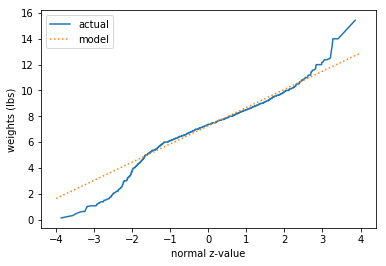

In [112]:
# generate random gaussian numbers
z_values = sorted(np.random.randn(len(x)))
plt.plot(z_values,x,label='actual')

# plot the z(mean,std) vs z_std(0,1)

x1,y1 = fitLine(x)
plt.plot(x1,y1,linestyle=':',label='model')
plt.xlabel('normal z-value')
plt.ylabel('weights (lbs)')
plt.legend()

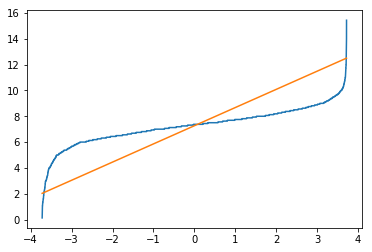

In [110]:
# The mistake I was making is generating random z-values from normal distribution with given mean and std 
# not from standard normal distribution.
# this given very high z-values and ends up with plot like this shown below-
cdf,std_z = norm_cdf(len(x),0,1)
plt.plot(sorted(std_z),x)
cdf,z = norm_cdf(len(x),np.mean(x),np.std(x))
plt.plot(sorted(std_z),sorted(z))

In [113]:
np.linspace(norm.ppf(0.0001,loc=mean,scale=std),norm.ppf(0.9999,loc=mean,scale=std),10)

array([ 2.02816192,  3.19204337,  4.35592482,  5.51980628,  6.68368773,
        7.84756918,  9.01145064, 10.17533209, 11.33921354, 12.503095  ])

In [114]:
np.linspace(norm.ppf(0.0001),norm.ppf(0.9999),10)

array([-3.71901649, -2.89256838, -2.06612027, -1.23967216, -0.41322405,
        0.41322405,  1.23967216,  2.06612027,  2.89256838,  3.71901649])